## Modifying the picture with opencv and numpy libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
!wget -q https://github.com/AlexeyAB/darknet/releases/download/yolov4/yolov7.weights 

In [3]:
!wget -q https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov7.cfg

In [4]:
net = cv2.dnn.readNetFromDarknet('yolov7.cfg', 'yolov7.weights')
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)

In [5]:
yolo_model = cv2.dnn_DetectionModel(net)
yolo_model.setInputParams(size=(1280, 1280), scale=1 / 255, swapRB=True)

**Just run the above cells without any changes**

In [9]:
"""
Please read the provided image in RGB with opencv lib and print the matrices

see bellow links:
https://numpy.org/doc/stable/reference/generated/numpy.maximum.html
https://numpy.org/doc/stable/reference/generated/numpy.minimum.html
https://numpy.org/doc/stable/reference/generated/numpy.mean.html
"""

image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Q5.png")

shape = image.shape
types = image.dtype
avg = np.mean(image)
max = np.max(image) 
min = np.min(image)
all_pixels = image[:,:,0]   

print("shape: ", shape)
print("types: ", types)
print("avg: ", avg)
print("max: ", max)
print("min: ", min) 
print("all_pixels: ", all_pixels)

shape:  (721, 1281, 3)
types:  uint8
avg:  139.98719468688319
max:  255
min:  0
all_pixels:  [[126 113 152 ... 154 154 154]
 [128 128 149 ... 154 153 154]
 [135 156 148 ... 153 153 153]
 ...
 [122 122 123 ... 139 138 139]
 [123 124 124 ... 139 139 139]
 [123 123 123 ... 138 137 137]]


In [10]:

#### Just run this cell 


CONFIDENCE_THRESHOLD = 0.2
NMS_THRESHOLD = 0.4 

classes, scores, boxes = yolo_model.detect(image, CONFIDENCE_THRESHOLD, NMS_THRESHOLD)

detections = [(box, score) for classid, score, box in zip(classes, scores, boxes)]

the result of the detection is classes of each object, 
confidence of predicting the class of that object and parameters of the bounding box

for every bounding box, we have bellow information:

x_min: the x coordinate of the left up corner of the bounding box

y_min: the y coordinate of the left up corner of the bounding box

w: the width of the bounding box

h: the height of the bounding box

In [14]:
### please print the details of the detections
for detection in detections:
  x_min = detection[0][0]
  y_min = detection[0][1]
  width = detection[0][2]
  height = detection[0][3]
  score = detection[1]
  print("x_min: ", x_min)
  print("y_min: ", y_min)
  print("width: ", width)
  print("height: ", height)
  print("score: ", score)
  print("---------------------")


x_min:  912
y_min:  634
width:  58
height:  86
score:  0.91715723
---------------------
x_min:  783
y_min:  383
width:  42
height:  82
score:  0.90026194
---------------------
x_min:  712
y_min:  390
width:  33
height:  89
score:  0.87853503
---------------------
x_min:  1000
y_min:  105
width:  17
height:  34
score:  0.85911363
---------------------
x_min:  744
y_min:  385
width:  32
height:  81
score:  0.8549012
---------------------
x_min:  794
y_min:  497
width:  62
height:  79
score:  0.8065705
---------------------
x_min:  140
y_min:  317
width:  32
height:  76
score:  0.7626901
---------------------
x_min:  164
y_min:  349
width:  24
height:  49
score:  0.6349918
---------------------
x_min:  1044
y_min:  0
width:  8
height:  9
score:  0.6117254
---------------------
x_min:  1109
y_min:  454
width:  53
height:  75
score:  0.60562724
---------------------
x_min:  612
y_min:  139
width:  17
height:  37
score:  0.5378799
---------------------
x_min:  981
y_min:  30
width:  10
heigh

This function takes a frame (an image) and a list of detections, where each detection is a tuple of `(box, score)` where box is a tuple of `(x, y, w, h) which represents the coordinates of a bounding box around an object and score is a float number representing the confidence score of the object detection.

The function draws all bounding boxes on the original image and shows the result using matplotlib's `imshow()` function. It also saves the resulting image with the name 'result.png' using OpenCV's `imwrite()` function.

The implementation first creates a copy of the input frame to avoid modifying the original image. Then, it iterates over all detections, extracts the coordinates of the bounding box and draws it on the image using OpenCV's `rectangle()` function. It also puts the confidence score on the top of the bounding box using OpenCV's `putText()` function. Finally, it displays the resulting image using matplotlib's `imshow()` function and saves the image to a file using OpenCV's `imwrite()` function.

In [11]:
def visualize(frame, detections):
  """
  Draw all bounding boxes on the main original image and show the result
  Then save result with result.png name

  see the bellow links:
  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
  https://www.geeksforgeeks.org/python-opencv-cv2-imwrite-method/
  """

  ########################################
  ########### YOUR CODES GO HERE #########
  generated_img = frame.copy()
  for box, score in detections:
    x, y, w, h = box
    cv2.rectangle(generated_img, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.putText(generated_img, f'{score:.2f}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

  plt.imshow(generated_img)
  plt.show()
  cv2.imwrite('result.png', generated_img)
  ########################################

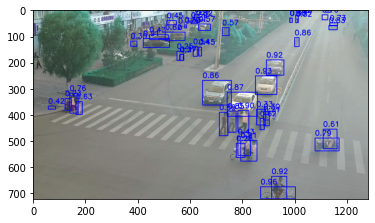

In [12]:
visualize(image, detections)

In [13]:
# Check if file has been saved or not
!(ls result.png && echo yes) || echo no

result.png
yes
